<h3>hw8: assert, exceptions, tests</h3>

Оператор assert в Python используется для отладки и написания тестов. <br>
<code>assert <УСЛОВИЕ></code><br>
assert проверяет, является ли условие истинным. <br>
Если условие истинно, выполнение программы продолжается.<br> 
Если условие ложно, оператор assert вызывает исключение AssertionError, что приводит к остановке выполнения программы.
<br>
фактически, запись <code>assert <УСЛОВИЕ></code> эквивалентна  следующей:<br>
<code>if not <УСЛОВИЕ>:
    raise AssertionError</code><br>
Посмотрите примеры ниже:


In [1]:
a_number = 5
assert 5 == a_number
assert 6 == a_number

AssertionError: 

In [2]:
a_number = 5
if not 5 == a_number:
    raise AssertionError
if not 6 == a_number:
    raise AssertionError

AssertionError: 

Известная система автоматизации тестирования для языка python <a href="https://doc.pytest.org/en/latest/" >py.test</a><br>
использует механизм assert для проверки корректности завершения каждого из тестов.<br>
В рамках hw8 мы попробуем создать свою мини-систему тестированию, совместимую с pytest.<br>

Тестировать мы будем функцию проверки типа треугольника,<br>
входом которой будут три числа - длины строн треугольника,<br>
а возвращаемыми значениями - строки "остроугольный", "тупоугольный", "прямоугольный" или "не треугольник"<br>
(спасибо https://github.com/VladimirVBykov за идею и основу реализации этой функции) <br>

In [2]:
def triangle_type(a: float, b: float, c: float) -> str:
    """
    Функция, определяющая тип треугольника по длинам его сторон
    """
    result = "не треугольник"
    triangle_exist = (a < (b + c)) and (b < (a + c)) and (c < (a + b))
    if triangle_exist:
        sides = [a, b, c]
        sides.sort()
        acuteTriangle = (sides[0]**2 + sides[1]**2) > sides[2]**2
        obtuseTriangle = (sides[0]**2 + sides[1]**2) < sides[2]**2
        rightTriangle = abs((sides[0]**2 + sides[1]**2) - sides[2]**2) <= 0.01

        if acuteTriangle:
            result = "остроугольный"
        elif obtuseTriangle:
            result = "тупоугольный"
        elif rightTriangle:
            result  = "прямоугольный"
    return result

Каждый тест для функции triangle_type в свою очередь является функцией. <br>
Для совместимости с pytest каждая такая функция-тест должна удовлетворять как минимум двум условиям:<br>
<ul>
    <li>название должно начинаться с <code>test_</code>, например <code>test_acute</code>;</li>
    <li>в случае, если на заданных входных данных ожидаемый результат не соответствует полученному,<br>
    должен выбрасываться <code>AssertionError</code>;</li>
    <li>если результат соответствует ожидаемому, функция-тест просто заканчивает выполнение.</li>
</ul>
Дополнительно, давайте условимся:
<ul>
<li>входные данные задавать в начале текста функции теста как локальную переменную <code>input</code> или  локальные переменные с префиксом <code>input_</code>,</li>
<li>ожидаемый результат задавать в локальной переменной <code>expected</code>,</li>
<li>функция-тест не принимает никаких значений и никаких не возвращает</li> 
</ul>
Пример функции-теста для проверки "остроугольности" треугольника приведен ниже:


In [4]:
def test_acute_0():
    """
    тестируем остроугольность треугольника
    """
    input = [12,12,5] # такие стороны у остроугольного треугольника 
    expected =  "остроугольный"
    assert expected == triangle_type(*input)
test_acute()

Какие можно писать функции-тесты (далее тесты), или что можно протестировать в коде, и т.п.:<br>
<ul>
    <li> В первую очередь это позитивные тесты:<br>
        Проверка функции в нормальных условиях работы, когда все происходит так, как ожидается, и нет сбоев или ошибок.<br>
        В нашем случае это задание входных данных, для которых мы ожидаем получение соответствующего результата: <br>
        для заданных длин сторон, соответствующих остроугольному треугольнику, будем ожидать от функции результат "остроугольный", и т.п.  <br>
        Эти тесты в принципе показывают, как можно корректно работать с данной функцией. 
    </li>
    <li>
        Негативные тесты:<br>
        Проверка функции на некорректных или неочевидных входных данных. <br>
        Ясно, что все возможные комбинации входных данных создать практически невозможно, можно выбрать какие-то наиболее вероятные варианты некорректных входных данных<br>
        Например, как функция поведет себя, если ей на вход поступят строковые данные, или отрицательные числа.
    </li>
</ul>
Чем больше тестов написано для функции, тем лучше.<br>
Желательно, чтобы полный набор тестов обеспечивал выполнение всех веток ветвления функции. На картинке ниже показана блок-схема некой функции,<br>
выполнение которой в зависимости от входных данных может пойти по одному из 4 путей, отображенных красной, зеленой, синей и фиолетовой линией.<br>
Как минимум, каждый из возможных путей выполнения функции должен быть покрыт тестом.

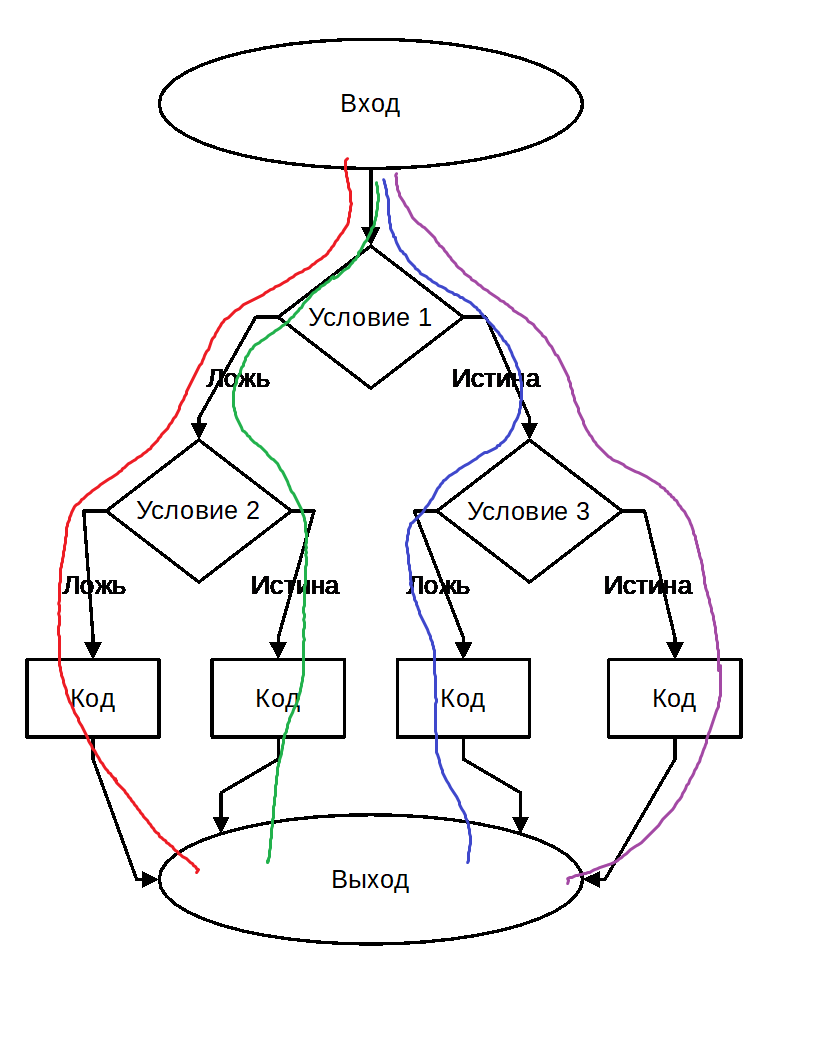

Теперь задание hw8:<br>
<hr>
Тесты для функции triangle_type():
<ol>
    <li>Написать достаточное количество позитивных тестов;</li>
    <li>Написать два-три негативных теста;</li>
    <li>Вызвать все тесты (вручную), убедиться в их работоспособности.</li>
</ol>
Система тестирования:<br>
    Так как мы используем механизм исключений, то ошибка в одном из тестов вызовет прекращение выполнения дальнейших тестов, если их просто так вызвать<br>
    (измените функцию triangle_type() так, чтобы один из тестов перестал выполняться и проверьте это)<br>
    В обычной ситуации мы бы воспользовались средством pytest, но в рамках этого задания необходимо написать свой собственный макет pytest.<br>
    Итак:<br>
    Нужно написать функцию, выполняющую роль "системы тестирования". Данная функция должна:
    <ol>
        <li>Вызвать все созданные вами на предыдущем этапе функции-тесты;</li>
        <li>В случае, если какой-то тест не выполнен, выдать соответствующее сообщение, и продолжить вызов оставшихся тестов;</li>
        <li>В случае, если какой-то тест выполнен, выдать соответствующее сообщение;</li>
        <li>* Выдать статистику выполненных/не выполненных тестов (например, "выполнено столько-то тестов, не выполнено столько-то").</li>
    </ol>
Модификация кода при наличии тестов:<br>
    Проведите анализ кода функции triangle_type(), и:
    <ol>
        <li>Попробуйте в ней что-то сломать, и посмотрите как это отразится на выполнении набора тестов;</li>
        <li>Попробуйте что-то в ней улучшить, и посмотрите как это отразится на выполнении набора тестов.</li>
    </ol>
<hr>   

In [3]:
def test_acute_1():
    """
    тестируем остроугольность треугольника
    """
    input = [12,12,5]  
    expected =  "остроугольный"
    assert expected == triangle_type(*input)
test_acute_1()

In [4]:
def test_acute_2():
    """
    тестируем тупогуготьность треугольника
    """
    input = [5,8,12] 
    expected =  "тупоугольный"
    assert expected == triangle_type(*input)
test_acute_2()  

In [5]:
def test_acute_3():
    """
    тестируем прямоугольность треугольника
    """
    input = [5,3,4] 
    expected =  "прямоугольный"
    assert expected == triangle_type(*input)
test_acute_3()

In [6]:
def test_acute_4():
    """
    тестируем тупогуготьность треугольника
    """
    input = [5,5,12]
    expected =  "тупоугольный"
    assert expected == triangle_type(*input)
test_acute_4()

AssertionError: 

In [7]:
def test_acute_5():
    """
    тестируем не треугольник
    """
    input = ['-5D','-4C','-3A'] # 
    expected =  "не треугольник"
    assert expected == triangle_type(*input)
test_acute_5()

In [16]:
def test_many_test():
    test_acute = [test_acute_1,  test_acute_2,  test_acute_3, test_acute_4, test_acute_5]
    ok = 0
    fail = 0
    for i, test_exe in enumerate(test_acute):
        try:
            test_exe()
            ok += 1
            print(F"Test {i+1} -- Ok")
        except Exception as error: 
            fail += 1
            print(F"Test {i+1} -- Не Ок")
    print(f"Выполнено {ok} тестов, Не выполено {fail} тестов")
test_many_test()

Test 1 -- Ok
Test 2 -- Ok
Test 3 -- Ok
Test 4 -- Не Ок
Test 5 -- Ok
Выполнено 4 тестов, Не выполено 1 тестов


In [1]:
def triangle_type(a: float, b: float, c: float) -> str:
    """
    Функция, определяющая тип треугольника по длинам его сторон
    """
    result = "не треугольник"
    triangle_exist = (a < (b + c)) and (b < (a + c)) and (c < (a + b))
    if triangle_exist:
        sides = [a, b, c]
        sides.sort()
        acuteTriangle = (sides[0]**2 + sides[1]**2) > sides[2]**2
        obtuseTriangle = (sides[0]**2 + sides[1]**2) < sides[2]**2
        rightTriangle = abs((sides[0]**2 + sides[1]**2) - sides[2]**2) <= 0.01

        if acuteTriangle:
            result = "остроугольный"
        elif obtuseTriangle:
            result = "тупоугольный"
        elif rightTriangle:
            result  = "прямоугольный"
    return result

In [2]:
def test_acute_6():
    """
    тестируем остроугольность треугольника
    """
    input = [12,12,5]  
    expected =  "остроугольный"
    assert expected == triangle_type(*input)
test_acute_6()

In [3]:
def test_acute_7():
    """
    тестируем тупогуготьность треугольника
    """
    input = [5,8,12] 
    expected =  "тупоугольный"
    assert expected == triangle_type(*input)
test_acute_7()

In [4]:
def test_acute_8():
    """
    тестируем прямоугольность треугольника
    """
    input = [5,3,4] 
    expected =  "прямоугольный"
    assert expected == triangle_type(*input)
test_acute_8()

In [5]:
def test_acute_9():
    """
    тестируем тупогуготьность треугольника
    """
    input = [5,8,12]
    expected =  "тупоугольный"
    assert expected == triangle_type(*input)
test_acute_9()

In [6]:
def test_acute_10():
    """
    тестируем не треугольник
    """
    input = ['-5D','-4C','-3A'] # 
    expected =  "не треугольник"
    assert expected == triangle_type(*input)
test_acute_10()

In [13]:
def test_many_test():
    test_acute = [test_acute_1,  test_acute_2,  test_acute_3, test_acute_4, test_acute_5]
    ok = 0
    fail = 0
    for i, test_exe in enumerate(test_acute):
        try:
            test_exe()
            ok += 1
            print(F"Test {i+1} -- Ok")
        except Exception as error: 
            fail += 1
            print(F"Test {i+1} -- Не Ок")
    print(f"Выполнено {ok} тестов, Не выполено {fail} тестов")
test_many_test()

Test 1 -- Ok
Test 2 -- Ok
Test 3 -- Ok
Test 4 -- Ok
Test 5 -- Ok
Выполнено 5 тестов, Не выполено 0 тестов
